# Group Project Proposal: 
# Analysis of the relationship between average age for committing homicide and geological location


## Introduction:

There has been an increase in the homicide rate in the U.S over the last couple of years, Ousey et al. suggest it is due to the increase in the immigration rate in the US, however, Fingerhut et al. (1998) suggest that there is a connection between homicide rate with age, race, sex and the level of urbanization. Our group has been interested in this topic and we found a dataset called ”Homicide Reports, 1980-2014“. This dataset includes murders from the FBI's Supplementary Homicide Report with more than 22,000 homicides that were not reported to the Justice Department. This dataset includes the age, race, sex, and ethnicity of victims and perpetrators, in addition to the relationship between the victim and perpetrator and the weapon used.

The cities that we will focus on analyzing are Los Angeles and New York. We are going to try to answer a couple of question in regard to these 2 cities. The first question we will try to answer is wether Perpetrator mean age in the 2 cities are different. Our null hypothesis will be that they have the same perpetrator mean age and that the geographical location, in this case city is not related to the age of the perpetrators. Whereas the alternative hypothesis is that they have different perpetrator mean age. The second question that we will be analyzing is whether the mean age of victims across these 2 cities are different and our null hypothesis is that they will have the same mean age of victims. The alternative hypothesis is instead that they have different mean age of victims. The last question that we are going to try and answer is whether the  Proportion of teenager (by teenager we mean people with age between 13 and 17 inclusive) perpetrator across these 2 cities are the same or not, and our null hypothesis is again that they are the same and the alternative hypothesis is that they are different. We chose to analyze these 2 cities because they are the cities with the most homicide cases in USA, Los Angeles for the western US and New York for the eastern US, and we thought that they could be representative of the areas with most homicides. Additionally for each test we will be using both bootstrapping methods and also asymptotic method and analyze which one of them is a better method to use.

## Preliminary Results:

### Loading library

In [2]:
library(cowplot)
library(datateachr)
library(digest)
library(gridExtra)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(broom)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()



### Reading data(Because our data is from Kaggle, so instead of reading it from web, we read it locally.)

In [3]:
data <- read.csv("data.csv")
head(data)

,X,Record.ID,Agency.Code,Agency.Name,Agency.Type,City,State,Year,Month,Incident,⋯,Victim.Ethnicity,Perpetrator.Sex,Perpetrator.Age,Perpetrator.Race,Perpetrator.Ethnicity,Relationship,Weapon,Victim.Count,Perpetrator.Count,Record.Source
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,⋯,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,1,402708,AR00400,Benton,Sheriff,Benton,Arkansas,2000,February,1,⋯,Not Hispanic,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0,FBI
2,2,402712,AR00403,Siloam Springs,Municipal Police,Benton,Arkansas,2000,June,1,⋯,Hispanic,Male,21,White,Hispanic,Acquaintance,Knife,0,0,FBI
3,3,402713,AR00403,Siloam Springs,Municipal Police,Benton,Arkansas,2000,July,1,⋯,Hispanic,Male,24,Asian/Pacific Islander,Unknown,Wife,Handgun,0,0,FBI
4,4,402718,AR01400,Columbia,Sheriff,Columbia,Arkansas,2000,February,1,⋯,Not Hispanic,Male,16,White,Not Hispanic,Acquaintance,Blunt Object,0,1,FBI
5,5,402726,AR01801,West Memphis,Municipal Police,Crittenden,Arkansas,2000,January,1,⋯,Not Hispanic,Male,40,Black,Not Hispanic,Girlfriend,Firearm,0,0,FBI
6,6,402727,AR01801,West Memphis,Municipal Police,Crittenden,Arkansas,2000,January,2,⋯,Not Hispanic,Male,39,Black,Not Hispanic,Wife,Firearm,0,0,FBI


In [4]:
str(data)

'data.frame':	84253 obs. of  25 variables:
 $ X                    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Record.ID            : int  402708 402712 402713 402718 402726 402727 402752 402754 402755 402765 ...
 $ Agency.Code          : chr  "AR00400" "AR00403" "AR00403" "AR01400" ...
 $ Agency.Name          : chr  "Benton" "Siloam Springs" "Siloam Springs" "Columbia" ...
 $ Agency.Type          : chr  "Sheriff" "Municipal Police" "Municipal Police" "Sheriff" ...
 $ City                 : chr  "Benton" "Benton" "Benton" "Columbia" ...
 $ State                : chr  "Arkansas" "Arkansas" "Arkansas" "Arkansas" ...
 $ Year                 : int  2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 ...
 $ Month                : chr  "February" "June" "July" "February" ...
 $ Incident             : int  1 1 1 1 1 2 1 3 1 1 ...
 $ Crime.Type           : chr  "Murder or Manslaughter" "Murder or Manslaughter" "Murder or Manslaughter" "Murder or Manslaughter" ...
 $ Crime.Solved         : chr  "No" "Yes"

### Wrangling data
We deselected all the columns that is irrelevant with our study and filtered out all the data with NA and unreasonable data(victim age higher than 200). 

In [5]:
clean_data <- data %>%
    filter(!is.na(Victim.Age),!is.na(Perpetrator.Age), Victim.Age != 0, Perpetrator.Age != 0, Victim.Age < 200) %>%
    select(-Record.ID:-Agency.Type, -State, -Incident, -Crime.Type, -Crime.Solved, -Victim.Sex, -Victim.Race:-Perpetrator.Sex, 
           -Perpetrator.Race:-Relationship, -Victim.Count:-Record.Source, -X)
LA_data <- clean_data %>%
    filter(City == "Los Angeles")
NY_data <- clean_data %>%
    filter(City == "New York")
head(LA_data)
cat("Los Angeles data population: ", nrow(LA_data))
head(NY_data)
cat("New York data population: ", nrow(NY_data))

,City,Year,Month,Victim.Age,Perpetrator.Age,Weapon
,<chr>,<int>,<chr>,<int>,<int>,<chr>
1,Los Angeles,2000,January,17,21,Handgun
2,Los Angeles,2000,January,26,52,Handgun
3,Los Angeles,2000,January,46,47,Blunt Object
4,Los Angeles,2000,February,50,33,Handgun
5,Los Angeles,2000,February,17,20,Handgun
6,Los Angeles,2000,February,70,34,Handgun


Los Angeles data population:  6100

,City,Year,Month,Victim.Age,Perpetrator.Age,Weapon
,<chr>,<int>,<chr>,<int>,<int>,<chr>
1,New York,2007,December,29,31,Firearm
2,New York,2007,January,16,21,Firearm
3,New York,2007,January,28,33,Knife
4,New York,2007,January,20,30,Firearm
5,New York,2007,February,36,42,Blunt Object
6,New York,2007,February,25,43,Firearm


New York data population:  1282

### Ploting data

In [6]:
LA_p_age_mean <- LA_data %>%
    summarize(mean = mean(Perpetrator.Age)) %>%
    pull()
LA_p_age_median <- LA_data %>%
    summarize(median = median(Perpetrator.Age)) %>%
    pull()
LA_p_age_sample_dist <- LA_data %>%
    ggplot(aes(x = Perpetrator.Age)) +
    geom_histogram(binwidth = 2) +
    geom_vline(xintercept = LA_p_age_mean) +
    annotate("text", x = 32.5, y = 890, label = "Mean") +
    annotate("text", x = 32.5, y = 860, label = round(LA_p_age_mean, 2)) +
    geom_vline(xintercept = LA_p_age_median, color = "red") +
    annotate("text", x = 20.5, y = 890, label = "Median", color = "red") +
    annotate("text", x = 20.5, y = 860, label = round(LA_p_age_median, 2), color = "red") +
    labs(x = "Perpetrator Age", title = "Perpetrator Age Sample Distribution of Los Angeles", y = "Count")

NY_p_age_mean <- NY_data %>%
    summarize(mean = mean(Perpetrator.Age)) %>%
    pull()
NY_p_age_median <- NY_data %>%
    summarize(median = median(Perpetrator.Age)) %>%
    pull()
NY_p_age_sample_dist <- NY_data %>%
    ggplot(aes(x = Perpetrator.Age)) +
    geom_histogram(binwidth = 2) +
    geom_vline(xintercept = NY_p_age_mean) +
    annotate("text", x = 34, y = 150, label = "Mean") +
    annotate("text", x = 34, y = 145, label = round(NY_p_age_mean, 2)) +
    geom_vline(xintercept = NY_p_age_median, color = "red") +
    annotate("text", x = 22, y = 150, label = "Median", color = "red") +
    annotate("text", x = 22, y = 145, label = round(NY_p_age_median, 2), color = "red") +
    labs(x = "Perpetrator Age", title = "Perpetrator Age Sample Distribution of New York", y = "Count")

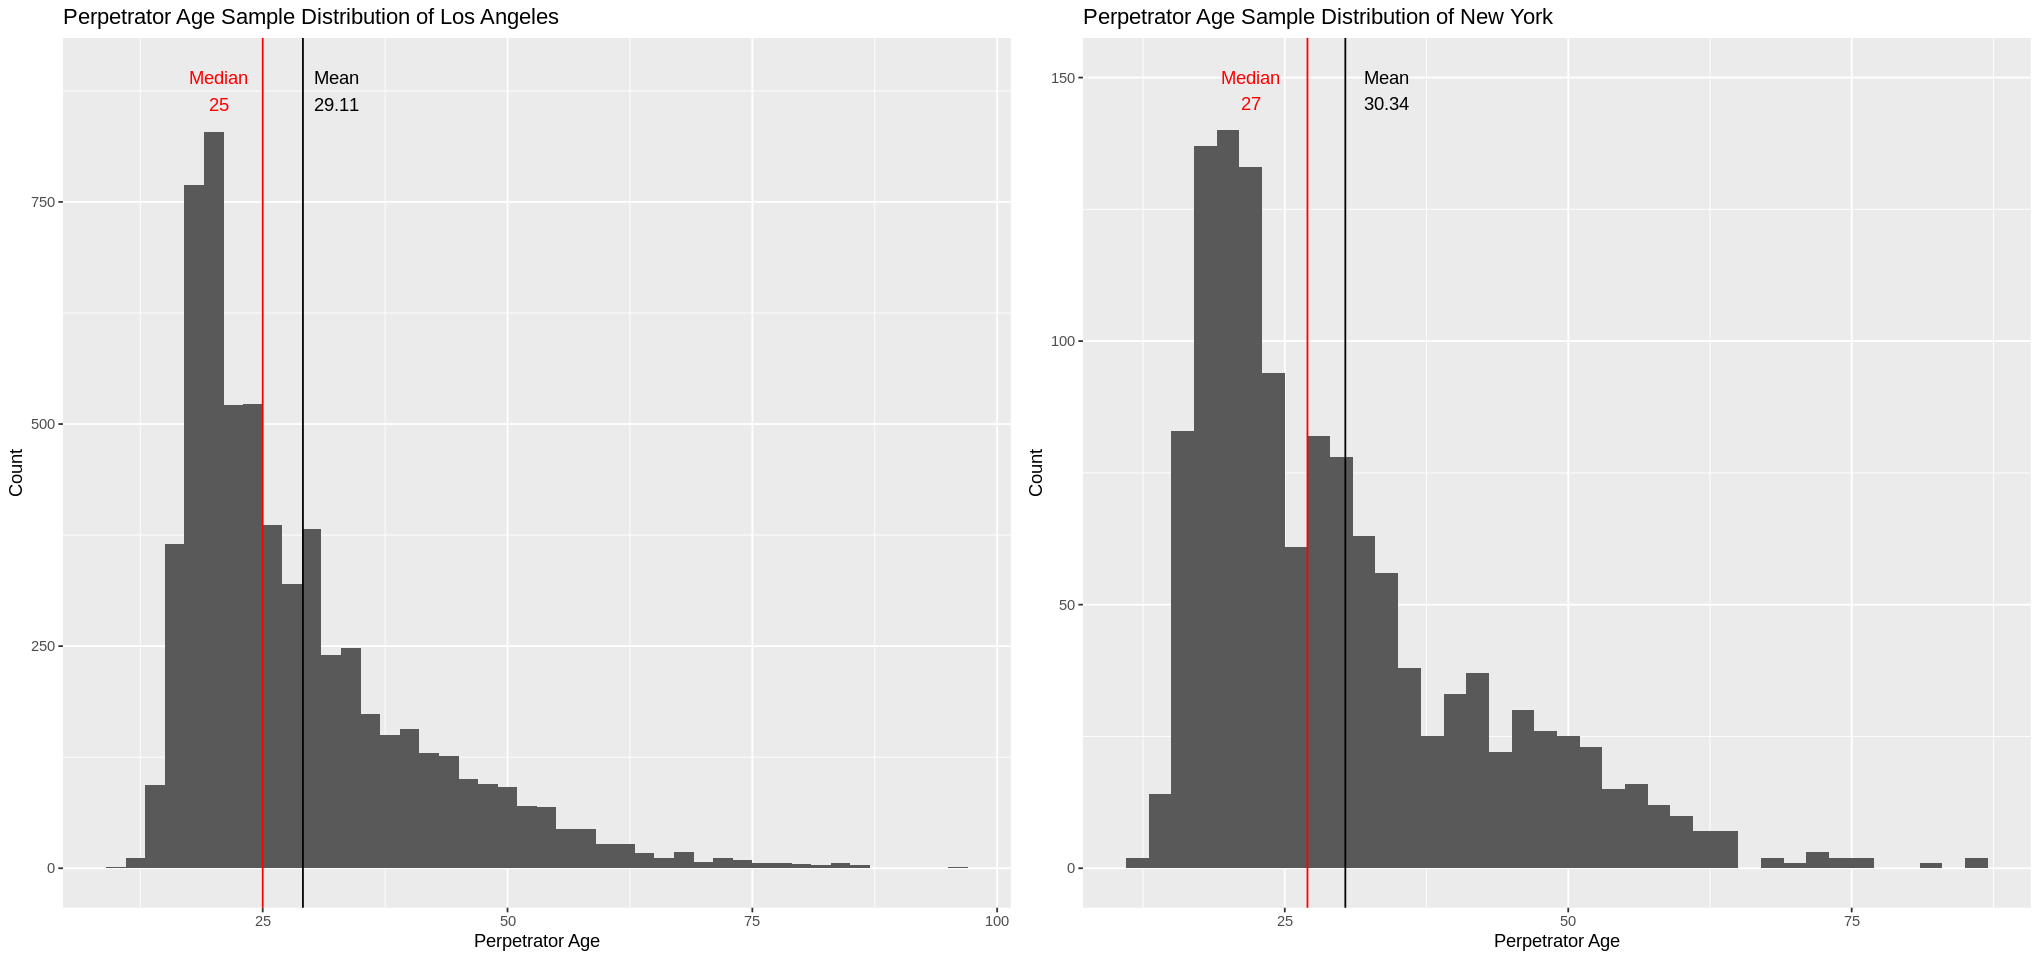

In [7]:
options(repr.plot.width = 17, repr.plot.height = 8)
plot_grid(LA_p_age_sample_dist, NY_p_age_sample_dist, ncol = 2)

### Analysis:
Comparing the ages of the perpetrators in two different cities, we can see that the shape of these two sample distributions is right-skewed(long right tail) with one peak. Similarly, the two plots have a similar peak at about 18. For both plots, the age of the perpetrators is mostly concentrated between 13 and 17 years old, and most of them are teenagers. So we need to look at the proportion of teenage perpetrators in the following. It is worth noting that the mean age of perpetrators in Los Angeles is a little bit wider than that in New York.

In [8]:
LA_v_age_mean <- LA_data %>%
    summarize(mean = mean(Victim.Age)) %>%
    pull()
LA_v_age_median <- LA_data %>%
    summarize(median = median(Victim.Age)) %>%
    pull()
LA_v_age_sample_dist <- LA_data %>%
    ggplot(aes(x = Victim.Age)) +
    geom_histogram(binwidth = 2) +
    geom_vline(xintercept = LA_v_age_mean) +
    annotate("text", x = 34.5, y = 540, label = "Mean") +
    annotate("text", x = 34.5, y = 520, label = round(LA_v_age_mean, 2)) +
    geom_vline(xintercept = LA_v_age_median, color = "red") +
    annotate("text", x = 22.5, y = 540, label = "Median", color = "red") +
    annotate("text", x = 22.5, y = 520, label = round(LA_v_age_median, 2), color = "red") +
    labs(x = "Victim Age", title = "Victim Age Sample Distribution of Los Angeles", y = "Count")

NY_v_age_mean <- NY_data %>%
    summarize(mean = mean(Victim.Age)) %>%
    pull()
NY_v_age_median <- NY_data %>%
    summarize(median = median(Victim.Age)) %>%
    pull()
NY_v_age_sample_dist <- NY_data %>%
    ggplot(aes(x = Victim.Age)) +
    geom_histogram(binwidth = 2) +
    geom_vline(xintercept = NY_v_age_mean) +
    annotate("text", x = 36, y = 120, label = "Mean") +
    annotate("text", x = 36, y = 115, label = round(NY_v_age_mean, 2)) +
    geom_vline(xintercept = NY_v_age_median, color = "red") +
    annotate("text", x = 24.5, y = 120, label = "Median", color = "red") +
    annotate("text", x = 24.5, y = 115, label = round(NY_v_age_median, 2), color = "red") +
    labs(x = "Victim Age", title = "Victim Age Sample Distribution of New York", y = "Count")

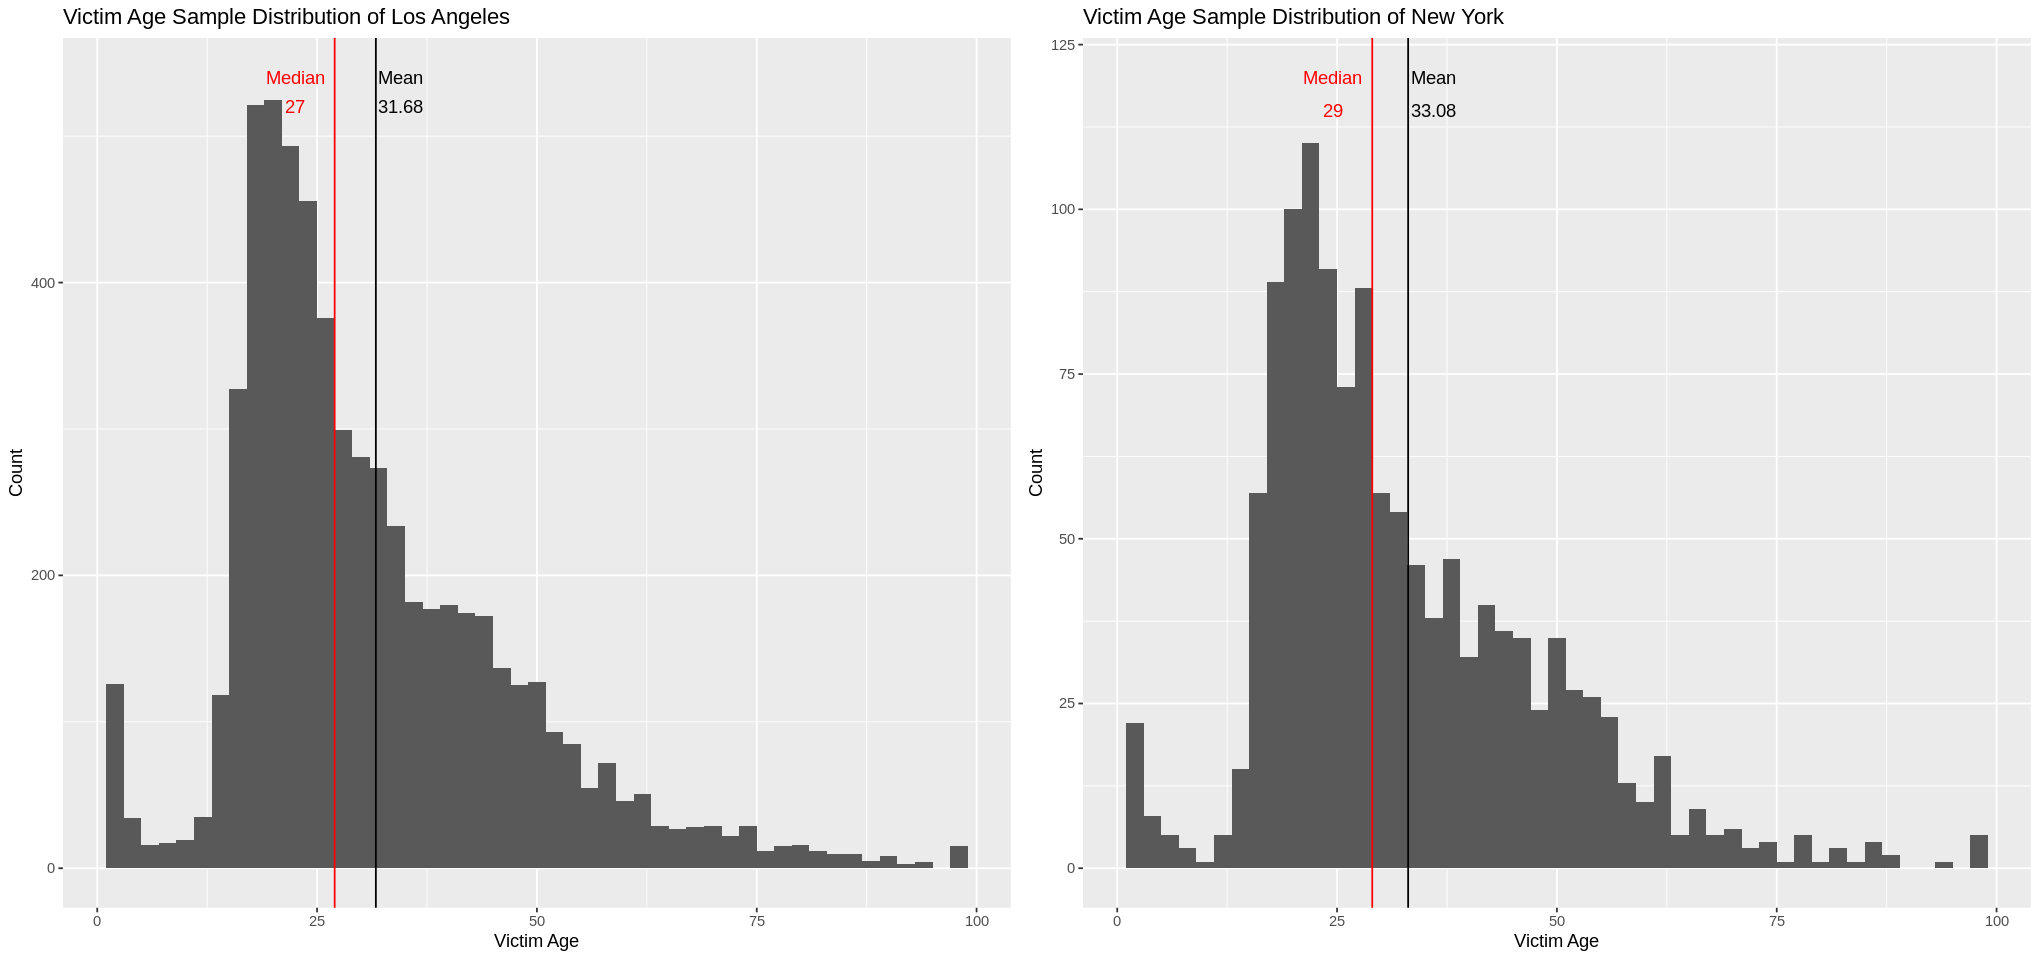

In [9]:
options(repr.plot.width = 17, repr.plot.height = 8)
plot_grid(LA_v_age_sample_dist, NY_v_age_sample_dist, ncol = 2)

### Analysis:
Comparing the ages of the victims in two different cities, we can see that the shape of these two sample distributions is right-skewed(long right tail) with two peaks, which can be considered bimodal plots. Similarly, the two highest points in both figures are at approximately 2 and 18. For both plots, the age of the victims is mostly concentrated between 13 and 17 years old, and most of them are teenagers. We can study the proportion of victims focusing on youth in the following paragraphs. It is not hard to see that there is an outlier in both plots at about 98. Overall, the mean and median ages of the victims in New York are greater than those in Los Angeles.

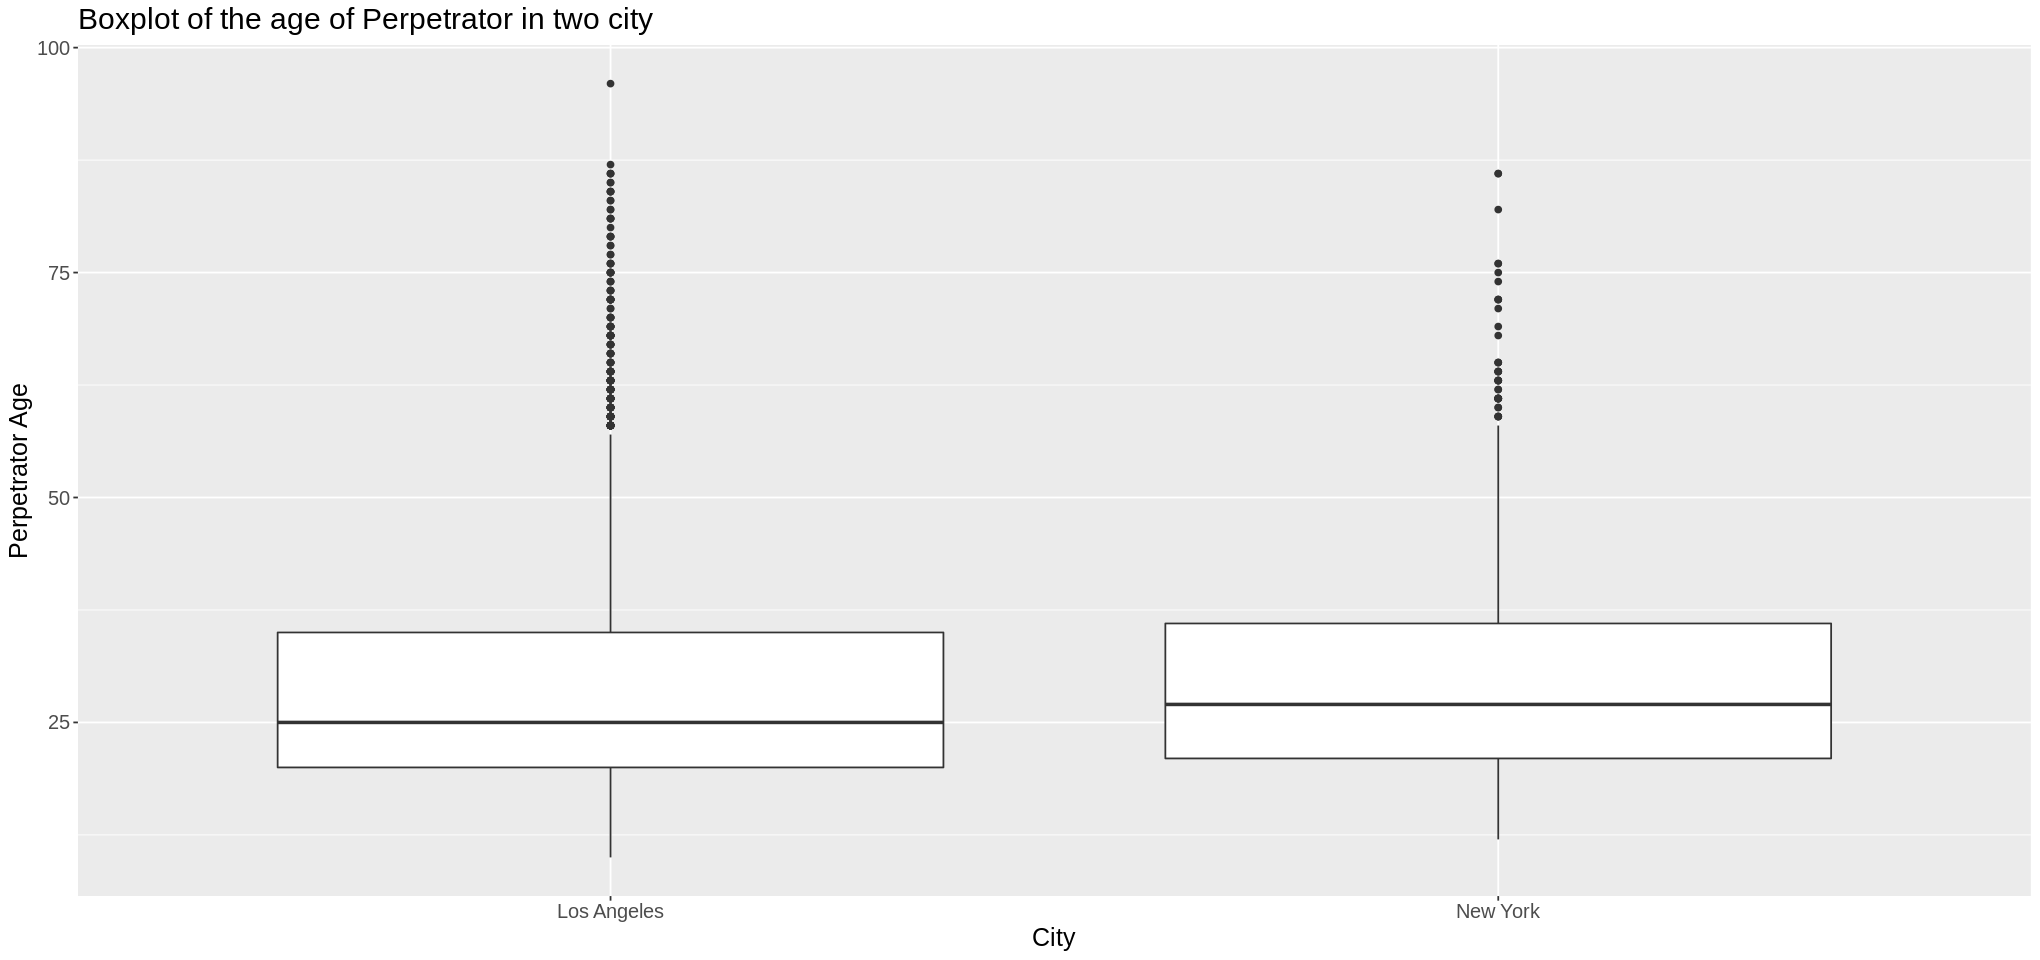

In [10]:
boxplots_perpetrator <- 
   clean_data %>%  
    filter(City %in% c("New York", "Los Angeles")) %>%
   ggplot(aes(x = City, y = Perpetrator.Age)) + 
   geom_boxplot() + 
   ylab("Perpetrator Age") +
   xlab("City") +
   ggtitle("Boxplot of the age of Perpetrator in two city") +
   theme(text = element_text(size=15))
boxplots_perpetrator

### Analysis:
The age range of perpetrators is almost same in both cities. The median age of perpetrators in Los Angeles is 25, but that in New York is slightly higher, at about 27. Notably, the age outliers in Los Angeles are wider than in New York, ranging from about 57 to 97. The extreme values range in New York ranges from 57 to 87. The boxplot indicates that the perpetrators in New York are older than those in Los Angeles. But we have to use a hypothesis test to confirm.

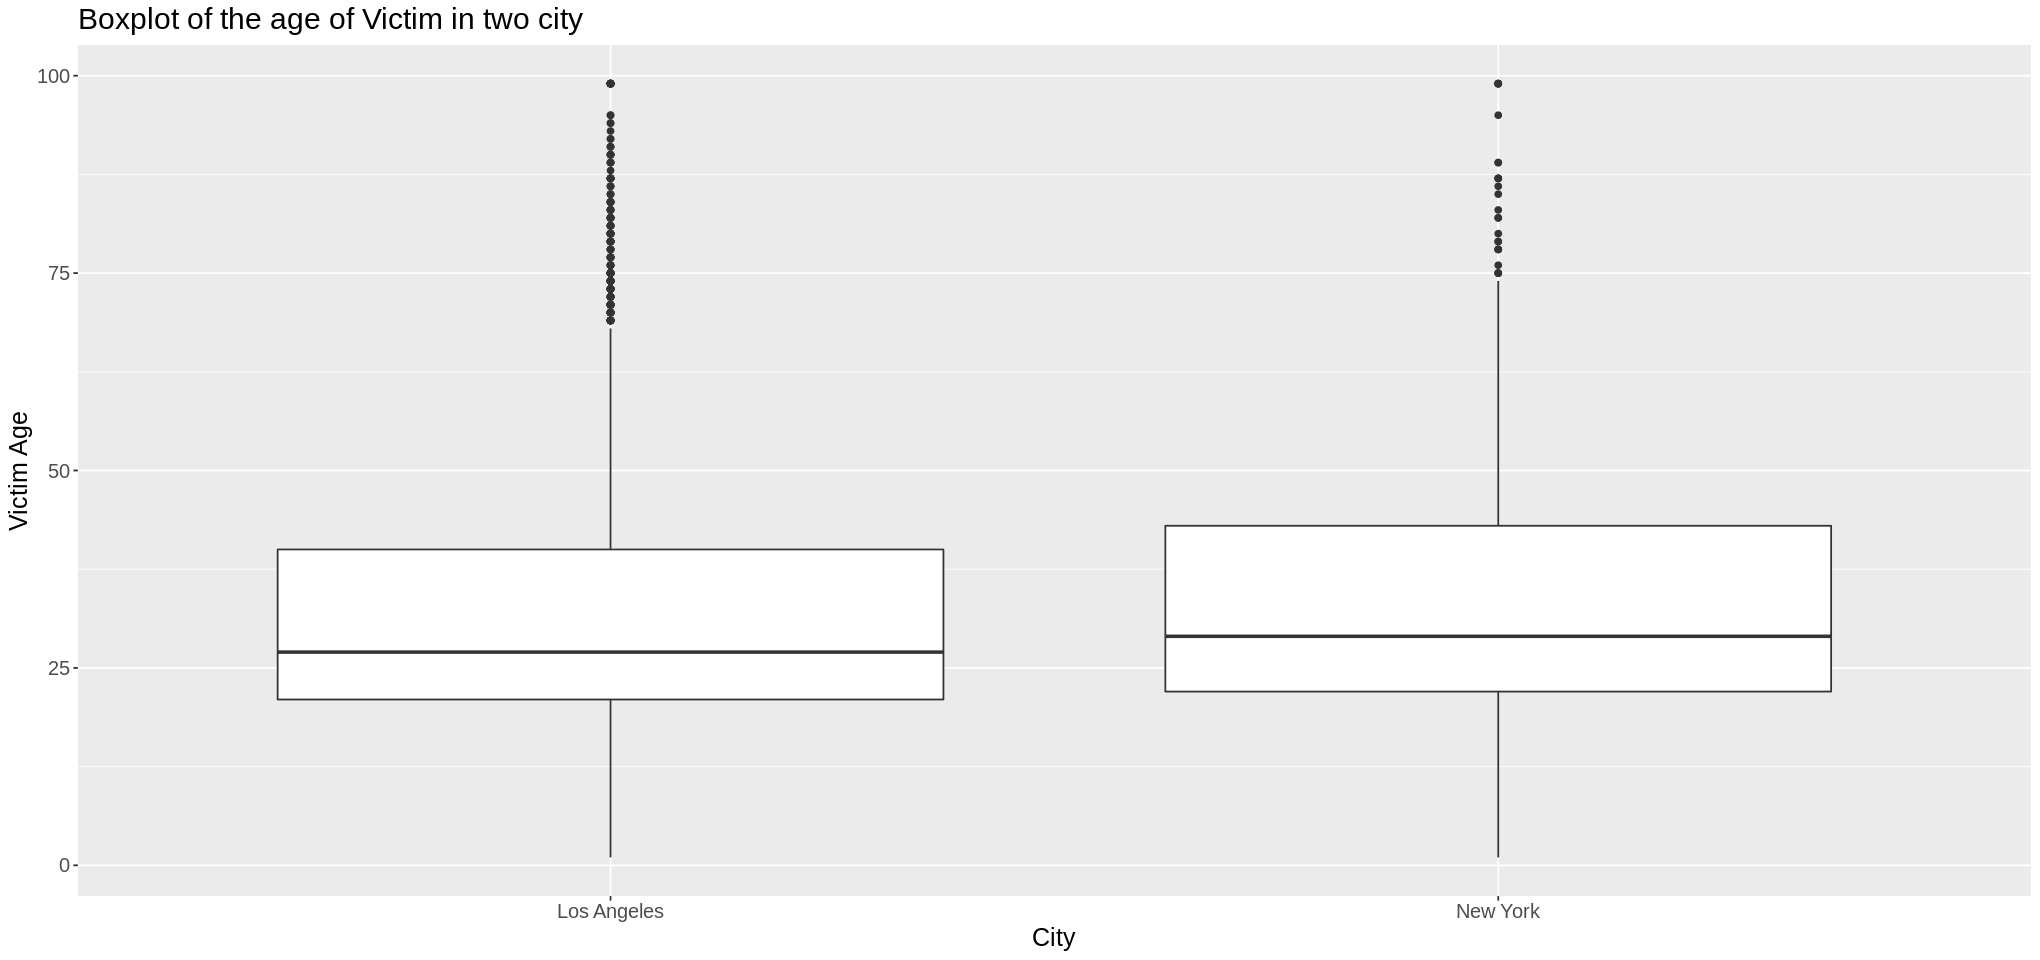

In [11]:
boxplots_victim <- 
   clean_data %>%  
    filter(City %in% c("New York", "Los Angeles")) %>%
   ggplot(aes(x = City, y = Victim.Age)) + 
   geom_boxplot() + 
   ylab("Victim Age") +
   xlab("City") +
   ggtitle("Boxplot of the age of Victim in two city") +
   theme(text = element_text(size=15))
boxplots_victim

### Analysis:
The age range of victims is a little bit wider in New York than that in Los Angeles. The median age of perpetrators in Los Angeles is about 27, but that in New York is slightly higher at approximately 29. Similar to the perpetrator age, the outliers of victims' age in Los Angeles are wider than in New York, ranging from about 69 to 100. The extreme values in New York range from 75 to 100. The boxplots show that the victims in the two cities are about the same age, so we still need to test the hypothesis.

## Hypothesis Testing:

 Hypothesis 1: Perpetrator mean age difference between Los Angles and New York
- $H_0: \mu_1 - \mu_2 = 0$ vs $H_1: \mu_1 - \mu_2 \neq 0$
 
 Hypothesis 2:  Victim mean age difference between Los Angles and New York
- $H_0: \mu_3 - \mu_4 = 0$ vs $H_1: \mu_3 - \mu_4 \neq 0$
 
 Hypothesis 3:  Proportion of teenager perpetrator difference between Los Angles and New York
- $H_0: p_1 - p_2 = 0$ vs $H_1: p_1 - p_2 \neq 0$

## Method plan:
For each hypothesis, we test it by both bootstrapping and asymptotics methods to see if these two methods give us similar P value and same conclusion. 

**In bootstrapping method:** For each hypothesis, we firstly calculate the test statistic for the hypothesis, then generating a Null model, visualize the model and confidence interval. Finally, we use the Null model and test statistic to get the P value.

**In asymptotics method:** Since we take two independent samples, one from each population. By independent samples, we mean that the individuals are selected independently in each population and we can calculate the smaple mean and sample standard deviation. Furthermore, even though the sample is not normally distributed, the sample have a large size(n = 7382, 6100 in LA, 1282 in NY), we can rely on the CLT and use two-sample t-test to test the difference between two independent populations' means and two-sample p-test to test the difference between two independent populations' proportions.

### Bootstrapping:

**Hypothesis 1**

Let $\mu_1$ be the mean age of perpetrators in Los Angeles, and let $\mu_2$ be the mean age of perpetrators in New York. We will perform hypothesis testing on $\mu_1 - \mu_2$ at a 5 % significance level. The null hypothesis is $\mu_1 = \mu_2$.

In [ ]:
set.seed(2000)
obs_mean_perp_diff <- 
    clean_data %>% 
    filter(City %in% c("Los Angeles", "New York")) %>%
    group_by(City) %>% 
    summarise(mean = mean(Perpetrator.Age)) %>%
    pivot_wider(names_from = City, values_from = mean) %>%
    transmute(diff = `Los Angeles` - `New York`) %>%
    pull(diff)
null_model_perpetrator_mean <-  
   filter(clean_data, City %in% c("Los Angeles", "New York")) %>%
   specify(formula = Perpetrator.Age ~ City) %>% 
   hypothesize(null = "independence") %>% 
   generate(reps = 3000, type = "permute") %>% 
   calculate(stat="diff in means", order = c("Los Angeles", "New York"))
diff_in_perpetrator_means_ci <- null_model_perpetrator_mean %>%
    get_confidence_interval(level = 0.95, type = "percentile")
result_plot_perpetrator <- 
   null_model_perpetrator_mean %>%
   visualize() + 
   shade_confidence_interval(diff_in_perpetrator_means_ci) +
   shade_p_value(obs_stat = obs_mean_perp_diff, direction = "both") +
   labs(x = "Mean Difference in Age of Perpetrator", title = "NULL Distrubution of Mean Difference in Perpetrator Age")
p_value_mean_prep <- 
    null_model_perpetrator_mean %>% 
    get_p_value(obs_stat = obs_mean_perp_diff, direction = "both") %>%
    pull()
result_plot_perpetrator
cat("P value is: ", p_value_mean_prep)

Since the p-value is 0.001333333, which is lower than 5%.Therefore, we reject 𝐻0 at 5% significance level and conclude that there is a difference in the average age of perpetrators between the two cities.

**Hypothesis 2**

Let $\mu_3$ be the mean age of victims in Los Angeles, and let $\mu_4$ be the mean age of victims in New York. We will perform hypothesis testing on $\mu_3 - \mu_4$ at a 5 % significance level. The null hypothesis is $\mu_3 = \mu_4$.

In [2]:
set.seed(2000)
obs_mean_vict_diff <- 
    clean_data %>% 
    filter(City %in% c("Los Angeles", "New York")) %>%
    group_by(City) %>% 
    summarise(mean = mean(Victim.Age)) %>%
    pivot_wider(names_from = City, values_from = mean) %>%
    transmute(diff = `Los Angeles` - `New York`) %>%
    pull(diff)
null_model_vict_mean <-  
   filter(clean_data, City %in% c("Los Angeles", "New York")) %>%
   specify(formula = Victim.Age ~ City) %>% 
   hypothesize(null = "independence") %>% 
   generate(reps = 3000, type = "permute") %>% 
   calculate(stat="diff in means", order = c("Los Angeles", "New York"))
diff_in_victim_means_ci <- null_model_vict_mean %>%
    get_confidence_interval(level = 0.95, type = "percentile")
result_plot_vict <- 
   null_model_vict_mean %>%
   visualize() + 
   shade_confidence_interval(diff_in_victim_means_ci) +
   shade_p_value(obs_stat = obs_mean_vict_diff, direction = "both") +
   labs(x = "Mean Difference in Age of Victim", title = "NULL Distrubution of Mean Difference in Victim Age")
p_value_mean_vict <- 
    null_model_vict_mean %>% 
    get_p_value(obs_stat = obs_mean_vict_diff, direction = "both") %>%
    pull()
result_plot_vict
cat("P value is: ", p_value_mean_vict)

ERROR: Error in clean_data %>% filter(City %in% c("Los Angeles", "New York")) %>% : could not find function "%>%"


Since the p-value is 0.01, which is lower than 5%.Therefore, we reject 𝐻0 at 5% significance level and conclude that there is a difference in the average age of victims between the two cities.

**Hypothesis 3**

Let $p_1$ be the proportion of teenager(13-17) perpetrators in Los Angeles, and let $p_2$ be he proportion of teenager(13-17) perpetrators in New York. We will perform hypothesis testing on $p_1 - p_2$ at a 5 % significance level. The null hypothesis is $p_1 = p_2$.

In [ ]:
teen_proportion_data <- clean_data %>%
    filter(City %in% c("Los Angeles", "New York")) %>%
    mutate(perpetrator_teen = between(Perpetrator.Age, 13, 17),
           victim_teen = between(Victim.Age, 13, 17)) %>%
    select("City", "perpetrator_teen", "victim_teen")
head(teen_proportion_data)

In [ ]:
set.seed(2000)
obs_diff_prop_prep <- 
    select(teen_proportion_data, -victim_teen) %>%
    group_by(perpetrator_teen, City) %>%
    tally() %>%
    spread(perpetrator_teen, n) %>%
    mutate(prop = `TRUE`/(`TRUE` + `FALSE`)) %>%
    select(-`TRUE`, -`FALSE`) %>%
    pivot_wider(names_from = City, values_from = prop) %>%
    transmute(stat = `Los Angeles` - `New York`)
prop_prep_null_distribution <- 
    select(teen_proportion_data, -victim_teen) %>%
    specify(formula = City ~ perpetrator_teen, success = "Los Angeles") %>%
    hypothesize(null = "independence") %>%
    generate(type = "permute", reps = 3000) %>%
    calculate(stat = "diff in props", order = c("TRUE", "FALSE"))
diff_in_prop_prep_ci <- prop_prep_null_distribution %>%
    get_confidence_interval(level = 0.95, type = "percentile")
prop_prep_result_plot <- 
    prop_prep_null_distribution %>%
    visualize() +
    shade_confidence_interval(diff_in_prop_prep_ci) +
    shade_p_value(obs_stat = obs_diff_prop_prep, direction = "both") +
    labs(x = "Proportion Difference in Teenager(13-17) Perpetrator", title = "NULL Distrubution of Proportion Difference in Teenager Perpetrator")
p_value <- prop_prep_null_distribution %>%
    get_p_value(obs_stat = obs_diff_prop_prep, direction = "both") %>%
    pull()
prop_prep_result_plot
cat("P value is: ", p_value)

Since the p-value is 0.982, which is much higher than 5%. Therefore, we do not have enough evidence to reject 𝐻0 at 5% significance level and conclude that there is no difference in the proportion of teenager perpetrators between the two cities.

### Asymptotics:

**Hypothesis 1**

Let $\mu_1$ be the mean age of perpetrators in Los Angeles, and let $\mu_2$ be the mean age of perpetrators in New York. We will perform hypothesis testing on $\mu_1 - \mu_2$ at a 5 % significance level, by first finding the sample mean and then calculating the test statistic, at the end obtain the P_value according to it.  The null hypothesis is $\mu_1 = \mu_2$.

In [12]:
prep_summary <- 
     clean_data %>% 
     filter(City %in% c("Los Angeles", "New York")) %>% 
     group_by(City) %>% 
     summarise(sample_mean = mean(Perpetrator.Age), 
               sample_var = var(Perpetrator.Age), 
               n = n())
test_statistic <- 
   (prep_summary$sample_mean[2] - prep_summary$sample_mean[1]) / sqrt(prep_summary$sample_var[2] / prep_summary$n[2] + prep_summary$sample_var[1] / prep_summary$n[1])
v <- (prep_summary$sample_var[2] / prep_summary$n[2] + prep_summary$sample_var[1] / prep_summary$n[1])^2 / 
     (prep_summary$sample_var[2]^2 / (prep_summary$n[2]^2*(prep_summary$n[2]-1)) + prep_summary$sample_var[1]^2 / (prep_summary$n[1]^2*(prep_summary$n[1]-1)))
p_value <-2 * pt(test_statistic, v, lower.tail=FALSE)
cat("test statistic is:", test_statistic)
cat("\nP value is:", p_value)
t_test <- 
    tidy(
        t.test(x = select(LA_data,Perpetrator.Age),
               y = select(NY_data,Perpetrator.Age),
               alternative = "two.sided"))
t_test

test statistic is: 3.223876
P value is: 0.001287056

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-1.23448,29.10639,30.34087,-3.223876,0.001287056,1821.793,-1.985485,-0.4834757,Welch Two Sample t-test,two.sided


Since the p-value is 0.001287056, which is lower than 5%.Therefore, we reject 𝐻0 at 5% significance level and conclude that there is a difference in the average age of perpetrators between the two cities.

**Hypothesis 2**


Let $\mu_3$ be the mean age of victims in Los Angeles, and let $\mu_4$ be the mean age of victims in New York. We will perform hypothesis testing on $\mu_3 - \mu_4$ at a 5 % significance level, by first finding the sample mean and then calculating the test statistic, at the end obtain the P_value according to it. The null hypothesis is $\mu_3 = \mu_4$.

In [15]:
vict_summary <- 
     clean_data %>% 
     filter(City %in% c("Los Angeles", "New York")) %>% 
     group_by(City) %>% 
     summarise(sample_mean = mean(Victim.Age), 
               sample_var = var(Victim.Age), 
               n = n())
test_statistic <- 
   (vict_summary$sample_mean[2] - vict_summary$sample_mean[1]) / sqrt(vict_summary$sample_var[2] / vict_summary$n[2] + vict_summary$sample_var[1] / vict_summary$n[1])
v <- (vict_summary$sample_var[2] / vict_summary$n[2] + vict_summary$sample_var[1] / vict_summary$n[1])^2 / 
     (vict_summary$sample_var[2]^2 / (vict_summary$n[2]^2*(vict_summary$n[2]-1)) + vict_summary$sample_var[1]^2 / (vict_summary$n[1]^2*(vict_summary$n[1]-1)))
p_value <-2 * pt(test_statistic, v, lower.tail=FALSE)
cat("test statistic is:", test_statistic)
cat("\nP value is:", p_value)
t_test <- 
    tidy(
        t.test(x = select(LA_data,Victim.Age),
               y = select(NY_data,Victim.Age),
               alternative = "two.sided"))
t_test

test statistic is: 2.859963
P value is: 0.00428439

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-1.397149,31.68475,33.0819,-2.859963,0.00428439,1851.662,-2.355257,-0.4390413,Welch Two Sample t-test,two.sided


Since the p-value is 0.00428439	, which is lower than 5%.Therefore, we reject 𝐻0 at 5% significance level and conclude that there is a difference in the average age of victims between the two cities.

**Hypothesis 3**

Let $p_1$ be the proportion of teenager(13-17) perpetrators in Los Angeles, and let $p_2$ be he proportion of teenager(13-17) perpetrators in New York. We will perform hypothesis testing on $p_1 - p_2$ at a 5 % significance level, by first finding the sample proportion and then calculating the test statistic, at the end obtain the P_value according to it. The null hypothesis is $p_1 = p_2$.



In [85]:
perpetrator_qnts <- 
    teen_proportion_data %>% 
    group_by(City) %>% 
    count(perpetrator_teen)  %>% 
    mutate(p = n/sum(n))
perpetrator_qnts
n1 <- 
    perpetrator_qnts %>% 
    filter(City == "Los Angeles") %>% 
    pull(n) %>% 
    sum()

n2 <- 
    perpetrator_qnts %>% 
    filter(City == "New York") %>% 
    pull(n) %>% 
    sum()

p1 <- 
    perpetrator_qnts$p[1]

p2 <- 
    perpetrator_qnts$p[3]
p_test <- tidy(
        prop.test(x = c(n1*p1, n2*p2), 
                  n = c(n1, n2),
                  correct = FALSE, alternative = "two.sided")) 
p_test

City,perpetrator_teen,n,p
<chr>,<lgl>,<int>,<dbl>
Los Angeles,FALSE,5630,0.92295082
Los Angeles,TRUE,470,0.07704918
New York,FALSE,1184,0.92355694
New York,TRUE,98,0.07644306


estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.9229508,0.9235569,0.005479771,0.9409901,1,-0.01661648,0.01540423,2-sample test for equality of proportions without continuity correction,two.sided


Since the p-value is 0.9409901, which is much higher than 5%. Therefore, we do not have enough evidence to reject 𝐻0 at 5% significance level and conclude that there is no difference in the proportion of teenager perpetrators between the two cities.

### Conclusion:

We have used both bootstrapping method and asymptotic approach and we have gotten the p_values that can be used to make conclusion about our hypothesis.
First, we find that the datas did not show evidence in favour of the null hypothesis. the p_values from bootrstrap and asymptotic are 0.001333333 and 0.001287056 which is much lower than the 5% therefore we conclude that there is a difference in mean age of perpetrators across the two cities.
Second, we find that the datas did not show evidence in favour of the two cities having the same mean age of victims. the respective p_values obtained from bootstrapping and asypmtotics are 0.01 and 0.00428439 which are both below the significance level therefore we accept the alternative hypothesis that the mean age of victims are different across the 2 cities.
Third, the p_value for the null hypothesis that the two cities have the same proportion of teenager perpetrators are 0.982 and 0.9409901 from bootstrap and asympotic approach respectively. This is much higher than the 5% significance level therefore we accept the null hypothesis that the two cities have the same proportion of teenager perpetrators.
Although the p_value from bootstrapping and asymptotic were slightly different, we were able to reach to the same conclusion for all of the 3 hypothesis. This means that the two models are both effective in analyzing this specific dataset. Therfore what is important is to consider which approach is faster and easier way to reach to a conclusion. We think that the asymptotic approach is a better way to go in this case, this is because the sample size is really large and therefore we can use the t-test regardless of the distribution and it can also give really accurate results. Additionally by running a t-test we do not need to bootstrap and generate a lot of samples with replacement, this can avoid using a lot of time and can also avoid Kernel to die since it does not have a huge amount of work to process.

## Discussion:

## References:

Dataset: https://www.kaggle.com/datasets/murderaccountability/homicide-reports

Ousey, G. C., & Kubrin, C. E. (2014). Immigration and the changing nature of homicide in US cities, 1980-2010. Journal of Quantitative Criminology, 30(3), 453-483. doi:https://doi.org/10.1007/s10940-013-9210-5

Fingerhut LA, Ingram DD, Feldman JJ. Homicide Rates Among US Teenagers and Young Adults(1998): Differences by Mechanism, Level of Urbanization, Race, and Sex,1987 Through 1995. JAMA. 1998;280(5):423–427.     doi:10.1001/jama.280.5.423 
